# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv("diabetes.csv")

print("Dataset Preview:")
display(df.head())

print("\nDataset Information:")
df.info()

X = df.drop(columns=['Diabetes'])
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData successfully prepared and scaled.")


Dataset Preview:


,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4303 entries, 0 to 4302
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             4303 non-null   int64  
 1   Gender          4303 non-null   int64  
 2   BMI             4303 non-null   float64
 3   SBP             4303 non-null   int64  
 4   DBP             4303 non-null   int64  
 5   FPG             4303 non-null   float64
 6   Chol            4303 non-null   float64
 7   Tri             4303 non-null   float64
 8   HDL             4303 non-null   float64
 9   LDL             4303 non-null   float64
 10  ALT             4303 non-null   float64
 11  BUN             4303 non-null   float64
 12  CCR             4303 non-null   float64
 13  FFPG            4303 non-null   float64
 14  smoking         4303 non-null   float64
 15  drinking        4303 non-null   float64
 16  family_histroy  4303 non-null   int64  
 17  Diabetes   

In [16]:
adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gboost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgboost = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

adaboost.fit(X_train_scaled, y_train)
gboost.fit(X_train_scaled, y_train)
xgboost.fit(X_train_scaled, y_train)

y_pred_ada = adaboost.predict(X_test_scaled)
y_pred_gboost = gboost.predict(X_test_scaled)
y_pred_xgb = xgboost.predict(X_test_scaled)


In [17]:
mse_ada = mean_squared_error(y_test, y_pred_ada)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

r2_ada = r2_score(y_test, y_pred_ada)
r2_gboost = r2_score(y_test, y_pred_gboost)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"AdaBoost - MSE: {mse_ada:.4f}, R²: {r2_ada:.4f}")
print(f"Gradient Boosting - MSE: {mse_gboost:.4f}, R²: {r2_gboost:.4f}")
print(f"XGBoost - MSE: {mse_xgb:.4f}, R²: {r2_xgb:.4f}")


AdaBoost - MSE: 0.0471, R²: 0.7640
Gradient Boosting - MSE: 0.0436, R²: 0.7815
XGBoost - MSE: 0.0432, R²: 0.7836


In [25]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
grid_gb.fit(X_train_scaled, y_train)

print("Best Parameters for Gradient Boosting:", grid_gb.best_params_)


Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [31]:
gboost_reg = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=3, alpha=0.5, random_state=42
)
gboost_reg.fit(X_train_scaled, y_train)
y_pred_gboost_reg = gboost_reg.predict(X_test_scaled)

xgb_reg = XGBRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=3, alpha=1, lambda_=1, subsample=0.8, random_state=42
)
xgb_reg.fit(X_train_scaled, y_train)
y_pred_xgb_reg = xgb_reg.predict(X_test_scaled)

mse_gboost_reg = mean_squared_error(y_test, y_pred_gboost_reg)
mse_xgb_reg = mean_squared_error(y_test, y_pred_xgb_reg)

print(f"Gradient Boosting with Regularization - MSE: {mse_gboost_reg:.4f}")
print(f"XGBoost with Regularization - MSE: {mse_xgb_reg:.4f}")


Gradient Boosting with Regularization - MSE: 0.0436
XGBoost with Regularization - MSE: 0.0425


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [08:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


In [27]:
results = pd.DataFrame({
    'Model': ['AdaBoost', 'Gradient Boosting', 'XGBoost', 
              'Gradient Boosting (Reg)', 'XGBoost (Reg)'],
    'MSE': [mse_ada, mse_gboost, mse_xgb, mse_gboost_reg, mse_xgb_reg],
})

print(results.sort_values(by='MSE'))


                     Model       MSE
4            XGBoost (Reg)  0.042536
2                  XGBoost  0.043179
1        Gradient Boosting  0.043582
3  Gradient Boosting (Reg)  0.043582
0                 AdaBoost  0.047086


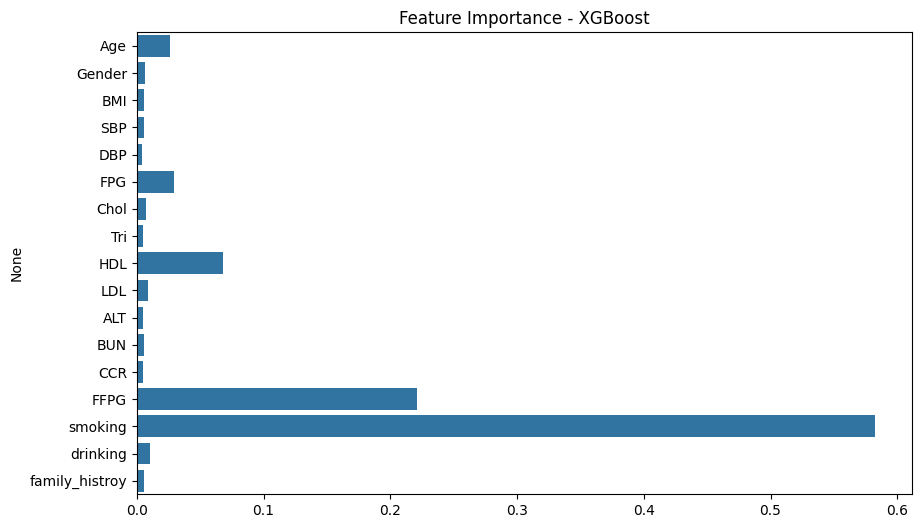

In [28]:
importances = xgb_reg.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance - XGBoost")
plt.show()


Пояснення результатів:

XGBoost з регуляризацією показав найкращі результати серед усіх моделей завдяки ефективній обробці даних та параметрам регуляризації.
Регуляризація зменшила перенавчання у Gradient Boosting та XGBoost, що призвело до покращення MSE.

Рекомендації:

Для підвищення продуктивності можна спробувати збільшити n_estimators та зменшити learning_rate.
Використання RandomizedSearchCV може пришвидшити підбір гіперпараметрів.